In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Train In

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
from ydata_profiling import ProfileReport

In [5]:
profile = ProfileReport(df, title="Profiling Report")

In [7]:
profile.to_file("titanic_data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualize Data

In [22]:
ls_columns_for_count_plot = ['Survived', 'Pclass', 'SibSp', 'Parch']
ls_columns_for_dist_plot = ['Fare', 'Age']

## Univariate Analysis

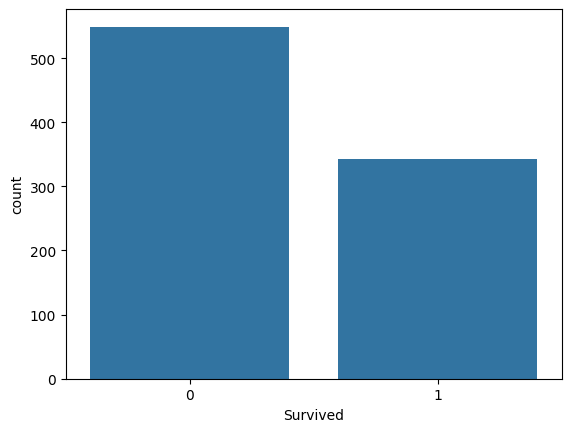

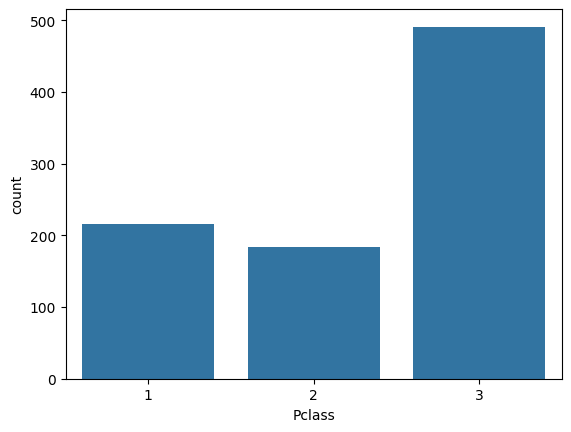

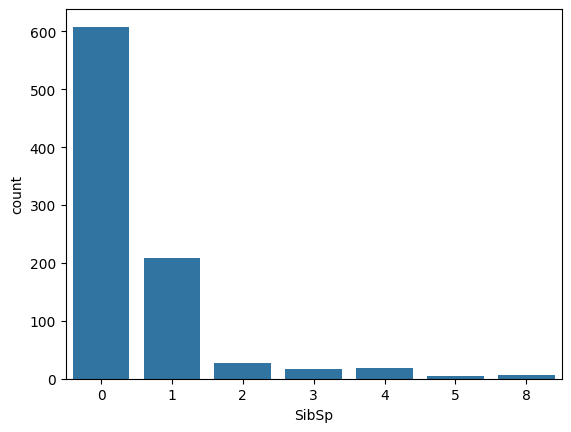

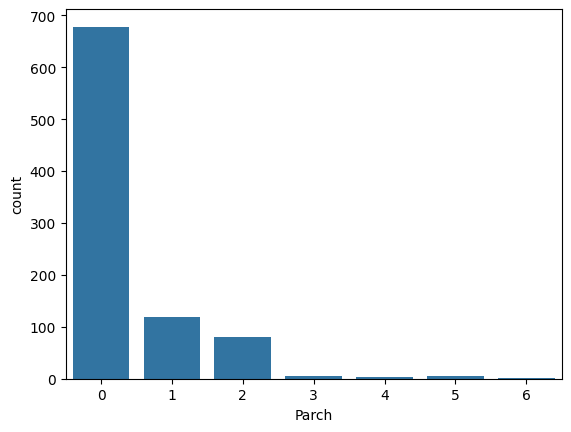

In [21]:
for var in ls_columns_for_count_plot:
    sns.countplot(df, x=var)
    plt.show()

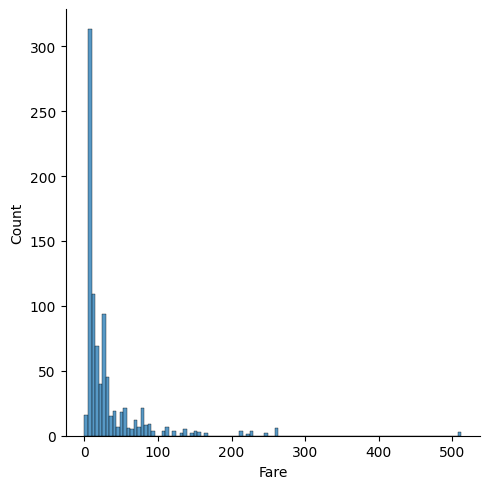

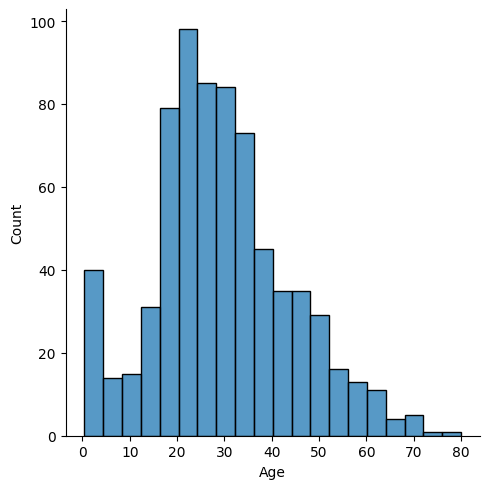

In [23]:
for var in ls_columns_for_dist_plot:
    sns.displot(df, x=var)
    plt.show()

## Bivariate Analysis on Target

In [25]:
ls_continous_vars = ['Age', 'Fare']
ls_categorical_vars = ['Survived', 'Pclass', 'SibSp', 'Parch']
target = 'Survived'

### Continuous Visualization

/Users/joemehltretter/miniforge3/envs/mehltrej/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


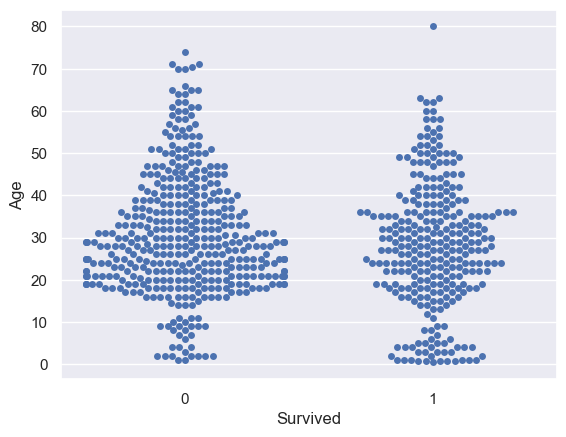

/Users/joemehltretter/miniforge3/envs/mehltrej/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joemehltretter/miniforge3/envs/mehltrej/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joemehltretter/miniforge3/envs/mehltrej/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joemehltretter/miniforge3/envs/mehltrej/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

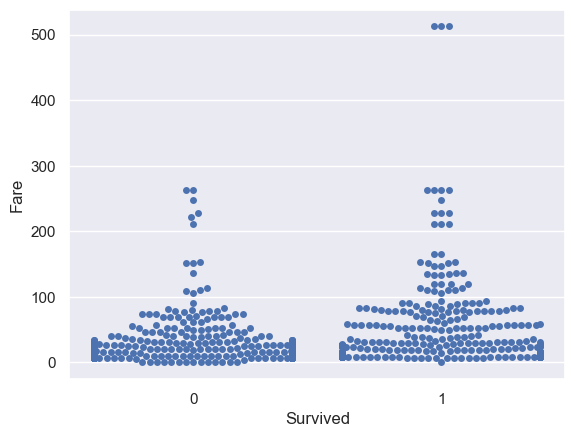

In [88]:
for var in ls_continous_vars:
    sns.swarmplot(x=target, y=var, data=df)
    plt.show()

### Categorical Visualizations

In [34]:
ct = pd.crosstab(df['Sex'], df[target])
print(ct.__dir__())

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloord

#### Cross Tab

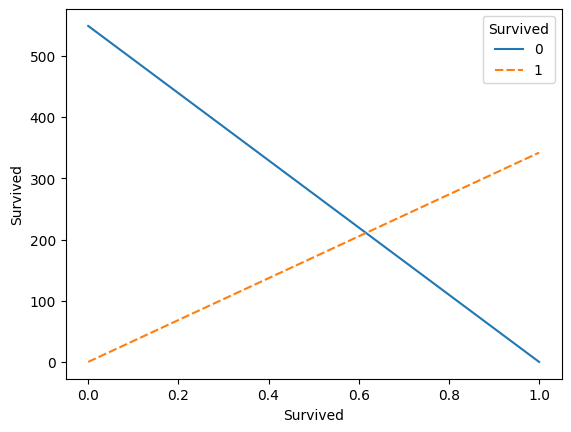

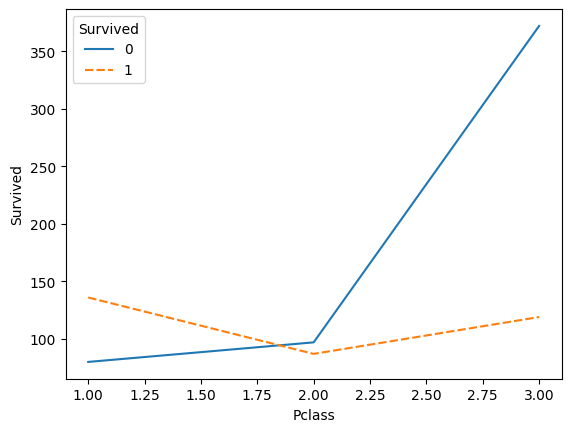

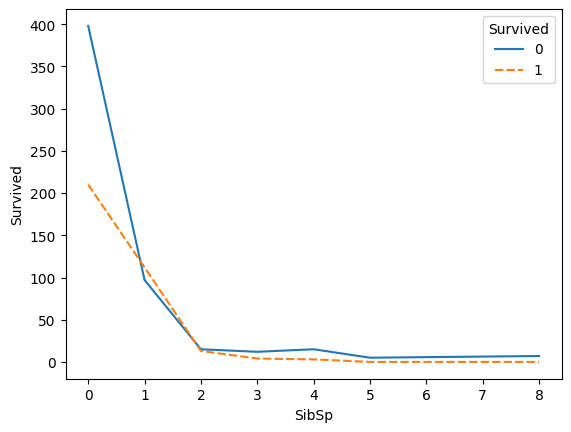

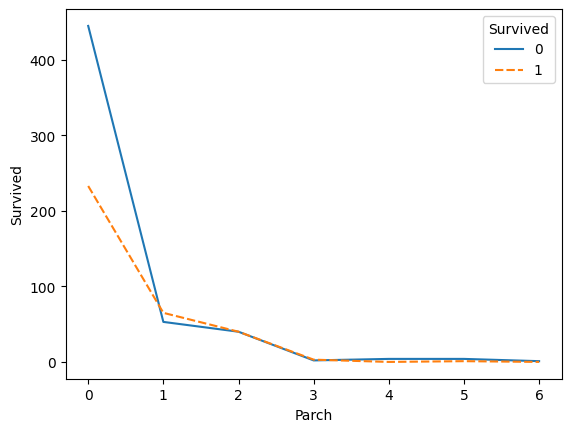

In [40]:
for var in ls_categorical_vars:
    current_ct = pd.crosstab(df[var], df[target])
    ax = sns.lineplot(data=current_ct)
    ax.set(xlabel=var, ylabel=target)
    plt.show()

#### Heatmap

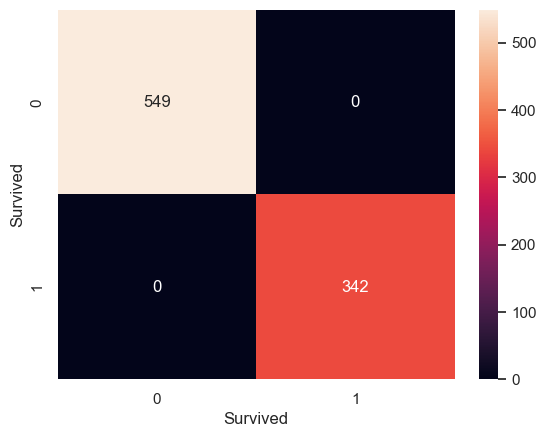

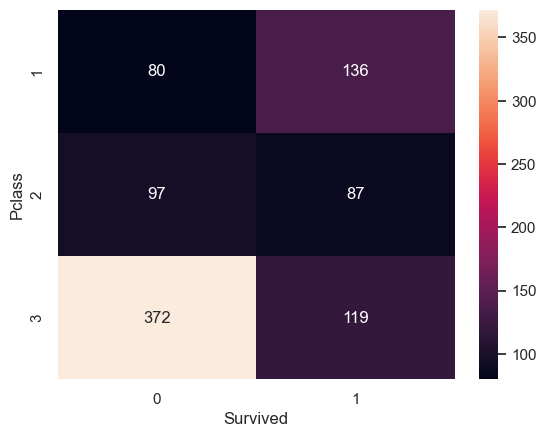

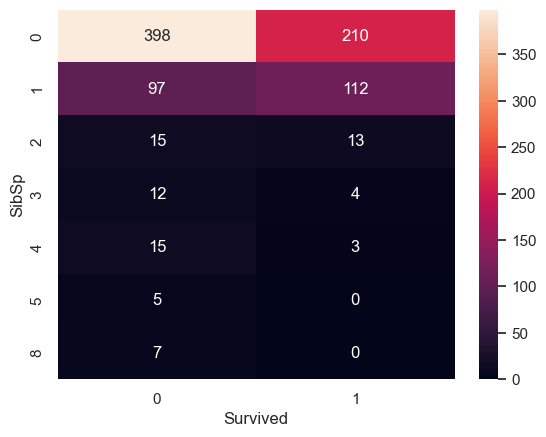

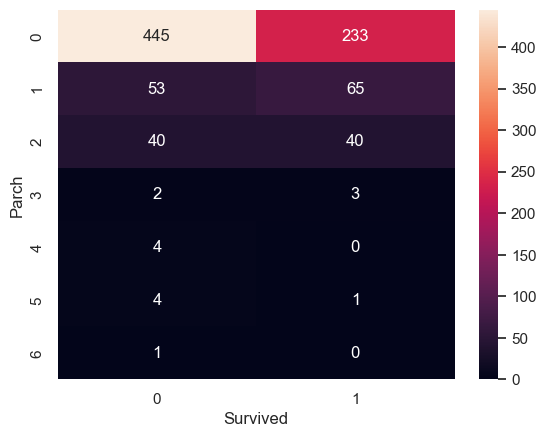

In [87]:
for var in ls_categorical_vars:
    grouped_counts = df.pivot_table(index=var, columns=target, aggfunc='size', fill_value=0)
    sns.heatmap(grouped_counts, annot=True, fmt='g')
    plt.show()